In [1]:
%matplotlib inline

# python 3.6.8
import os, itertools, csv

from IPython.display import Image
from IPython.display import display

# numpy  1.19.5
import numpy as np

# pandas  0.25.3
import pandas as pd

# scikit-learn  0.22
from sklearn.compose import ColumnTransformer
from sklearn.datasets import make_moons
from sklearn.impute import SimpleImputer 
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.svm import SVC

# matplotlib  3.1.2
import matplotlib
matplotlib.rcParams.update({'font.size': 22})
plt = matplotlib.pyplot

# load utility classes/functions that has been taught in previous labs
# e.g., plot_decision_regions()
from lib import *

# Make output directory
if not os.path.exists("output/") : os.mkdir("output/")

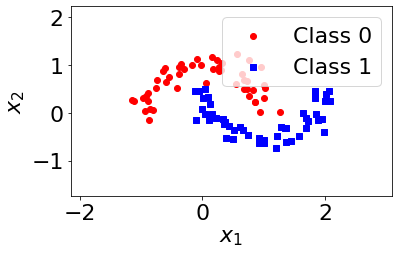

In [2]:
X, y = make_moons(n_samples=100, noise=0.15, random_state=0)

plt.scatter(X[y == 0, 0], X[y == 0, 1],
            c='r', marker='o', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1],
            c='b', marker='s', label='Class 1')

plt.xlim(X[:, 0].min()-1, X[:, 0].max()+1)
plt.ylim(X[:, 1].min()-1, X[:, 1].max()+1)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('./output/fig-two-moon.png', dpi=300)
plt.show()

[Perceptron]
Misclassified samples: 3
Accuracy: 0.85


/home/benny/Documents/DL2021/Lab07/lib.py:26: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(


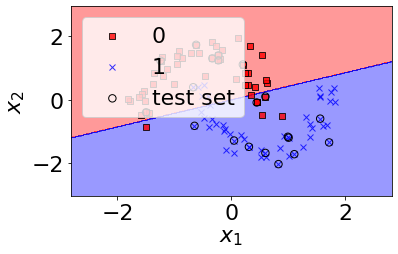

[Logistic regression]
Misclassified samples: 3
Accuracy: 0.85


/home/benny/Documents/DL2021/Lab07/lib.py:26: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(


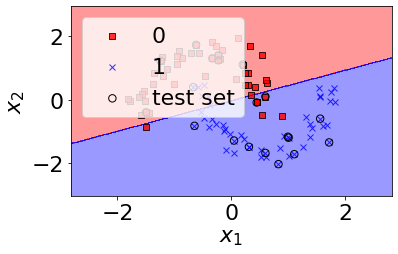

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

ppn = Perceptron(max_iter=1000, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)
y_pred = ppn.predict(X_test_std)
print('[Perceptron]')
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

# plot decision regions for Perceptron
plot_decision_regions(X_combined_std, y_combined,
                      classifier=ppn, 
                      test_idx=range(y_train.size, 
                                     y_train.size + y_test.size))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('./output/fig-two-moon-perceptron-boundray.png', dpi=300)
plt.show()

lr = LogisticRegression(C = 1000.0, random_state = 0, solver = "liblinear")
lr.fit(X_train_std, y_train)

y_pred = lr.predict(X_test_std)
print('[Logistic regression]')
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

# plot decision regions for LogisticRegression
plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, 
                      test_idx=range(y_train.size, 
                                     y_train.size + y_test.size))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('./output/fig-two-moon-logistic-regression-boundray.png', dpi=300)
plt.show()

[KNN]
Misclassified samples: 1
Accuracy: 0.95


/home/benny/Documents/DL2021/Lab07/lib.py:26: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(


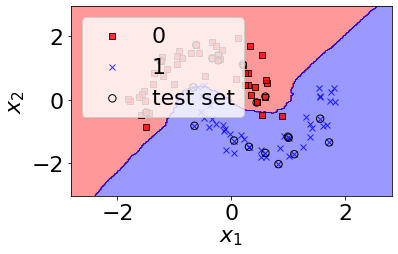

In [4]:
# p=2 and metric='minkowski' means the Euclidean Distance
knn = KNeighborsClassifier(n_neighbors=11, p=2, metric='minkowski')

knn.fit(X_train_std, y_train)
y_pred = knn.predict(X_test_std)
print('[KNN]')
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

# plot decision regions for knn classifier
plot_decision_regions(X_combined_std, y_combined,
                      classifier=knn, 
                      test_idx=range(y_train.size,
                                     y_train.size + y_test.size))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('./output/fig-two-moon-knn-boundray.png', dpi=300)
plt.show()

[Linear SVC]
Misclassified samples: 3
Accuracy: 0.85


/home/benny/Documents/DL2021/Lab07/lib.py:26: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(


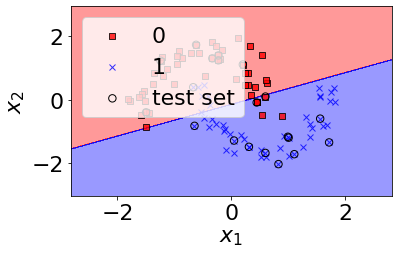

[Nonlinear SVC]
Misclassified samples: 1
Accuracy: 0.95


/home/benny/Documents/DL2021/Lab07/lib.py:26: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(


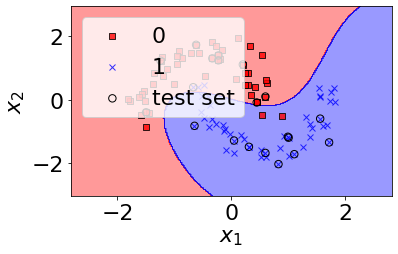

In [5]:
# kernel: the kernel function, can be 'linear', 'poly', 'rbf', ...etc
# C is the hyperparameter for the error penalty term
svm_linear = SVC(kernel='linear', C=1000.0, random_state=0)

svm_linear.fit(X_train_std, y_train)
y_pred = svm_linear.predict(X_test_std)
print('[Linear SVC]')
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

# plot decision regions for linear svm
plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm_linear, 
                      test_idx=range(y_train.size,
                                     y_train.size + y_test.size))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('./output/figtwo-moon-svm-linear-boundray.png', dpi=300)
plt.show()

# C is the hyperparameter for the error penalty term
# gamma is the hyperparameter for the rbf kernel
svm_rbf = SVC(kernel='rbf', random_state=0, gamma=0.2, C=10.0)

svm_rbf.fit(X_train_std, y_train)
y_pred = svm_rbf.predict(X_test_std)
print('[Nonlinear SVC]')
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

# plot decision regions for rbf svm
plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm_rbf, 
                      test_idx=range(y_train.size, 
                                     y_train.size + y_test.size))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('./output/fig-two-moon-svm-rbf-boundray.png', dpi=300)
plt.show()

In [6]:
print('[Nonlinear SVC: C=1000, gamma=0.01]')
svm = SVC(kernel='rbf', random_state=0, gamma=0.01, C=1000.0)
svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

print('\n[Nonlinear SVC: C=1, gamma=1]')
svm = SVC(kernel='rbf', random_state=0, gamma=0.0001, C=10.0)
svm.fit(X_train_std, y_train)
y_pred = svm.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

[Nonlinear SVC: C=1000, gamma=0.01]
Misclassified samples: 3
Accuracy: 0.85

[Nonlinear SVC: C=1, gamma=1]
Misclassified samples: 11
Accuracy: 0.45


In [7]:
param_C = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
param_gamma = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0]

svm = SVC(random_state=0)

# set the param_grid parameter of GridSearchCV to a list of dictionaries
param_grid = [{'C': param_C, 
               'gamma': param_gamma, 
               'kernel': ['rbf']}]
gs = GridSearchCV(estimator=svm, 
                  param_grid=param_grid, 
                  scoring='accuracy')

gs = gs.fit(X_train_std, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9625
{'C': 10.0, 'gamma': 1.0, 'kernel': 'rbf'}



[Nonlinear SVC: grid search]
Test accuracy: 1.00


/home/benny/Documents/DL2021/Lab07/lib.py:26: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(


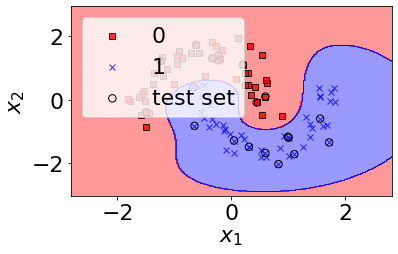

In [8]:
clf = gs.best_estimator_
clf.fit(X_train_std, y_train)
print('\n[Nonlinear SVC: grid search]')
print('Test accuracy: %.2f' % clf.score(X_test_std, y_test))

# plot decision regions for rbf svm
plot_decision_regions(X_combined_std, y_combined,
                      classifier=gs.best_estimator_, 
                      test_idx=range(y_train.size, 
                                     y_train.size + y_test.size))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('./output/fig-two-moon-svm-rbf-gs-boundray.png', dpi=300)
plt.show()

In [9]:
# we set sep=', ' since this dataset is not a regular csv file
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/'
                 'adult/adult.data', header=None, sep=', ', engine='python')

df.columns = ['age', 'workclass', 'fnlwgt', 'education', 
              'education-num', 'marital-status', 'occupation', 
              'relationship', 'race', 'sex', 'capital-gain', 
              'capital-loss', 'hours-per-week', 'native-country', 
              'label']

display(df.head(15))

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [10]:
# encode label first
label_le = LabelEncoder()
df['label'] = label_le.fit_transform(df['label'].values)

# encode categorical features
catego_features = ['workclass', 'education', 'marital-status', 'occupation', 
                   'relationship', 'race', 'sex', 'native-country']

catego_le = LabelEncoder()

# transform categorical values into numerical values
# be careful that '?' will also be encoded
# we have to replace it to NaN in numerical
categories = []
for i in catego_features:
    df[i] = catego_le.fit_transform(df[i].values)
    classes_list = catego_le.classes_.tolist()
    
    # replace '?' with 'NaN'
    if '?' in classes_list:
        idx = classes_list.index('?')
        df[i] = df[i].replace(idx, np.nan)
    
    # store the total number of values
    categories.append(np.arange(len(classes_list)))

display(df.head(15))

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,7.0,77516,9,13,4,1.0,1,4,1,2174,0,40,39.0,0
1,50,6.0,83311,9,13,2,4.0,0,4,1,0,0,13,39.0,0
2,38,4.0,215646,11,9,0,6.0,1,4,1,0,0,40,39.0,0
3,53,4.0,234721,1,7,2,6.0,0,2,1,0,0,40,39.0,0
4,28,4.0,338409,9,13,2,10.0,5,2,0,0,0,40,5.0,0
5,37,4.0,284582,12,14,2,4.0,5,4,0,0,0,40,39.0,0
6,49,4.0,160187,6,5,3,8.0,1,2,0,0,0,16,23.0,0
7,52,6.0,209642,11,9,2,4.0,0,4,1,0,0,45,39.0,1
8,31,4.0,45781,12,14,4,10.0,1,4,0,14084,0,50,39.0,1
9,42,4.0,159449,9,13,2,4.0,0,4,1,5178,0,40,39.0,1


In [11]:
# count the number of missing values per column
display(df.isnull().sum())

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
label                0
dtype: int64

In [12]:
print(df.shape)

# drop rows with missing values
df_drop_row = df.dropna()
print(df_drop_row.shape)

(32561, 15)
(30162, 15)


In [13]:
print('Original: {}'.format(df.shape))

# drop columns with missing values
df_drop_col = df.dropna(axis=1)
print('Drop column: {}'.format(df_drop_col.shape))

# drop rows or columns where all values are NaN
df_drop_row_all = df.dropna(how='all')
print('Drop row all: {}'.format(df_drop_row_all.shape))

# keep rows that have at least 14 non-NaN values
df_drop_row_thresh = df.dropna(thresh=14)
print('Drop row 14: {}'.format(df_drop_row_thresh.shape))

# only drop rows where NaN appear in specific columns (here: 'occupation')
df_drop_row_occupation = df.dropna(subset=['occupation'])
print('Drop row occupation: {}'.format(df_drop_row_occupation.shape))

Original: (32561, 15)
Drop column: (32561, 12)
Drop row all: (32561, 15)
Drop row 14: (30725, 15)
Drop row occupation: (30718, 15)


In [14]:
imr = SimpleImputer(missing_values = np.NaN, strategy = 'most_frequent')
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)

df_impute = pd.DataFrame(imputed_data)
df_impute.columns = df.columns

display(df.head(15))
display(df_impute.head(15))

# check if there are still missing values
display(df_impute.isnull().sum())

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,7.0,77516,9,13,4,1.0,1,4,1,2174,0,40,39.0,0
1,50,6.0,83311,9,13,2,4.0,0,4,1,0,0,13,39.0,0
2,38,4.0,215646,11,9,0,6.0,1,4,1,0,0,40,39.0,0
3,53,4.0,234721,1,7,2,6.0,0,2,1,0,0,40,39.0,0
4,28,4.0,338409,9,13,2,10.0,5,2,0,0,0,40,5.0,0
5,37,4.0,284582,12,14,2,4.0,5,4,0,0,0,40,39.0,0
6,49,4.0,160187,6,5,3,8.0,1,2,0,0,0,16,23.0,0
7,52,6.0,209642,11,9,2,4.0,0,4,1,0,0,45,39.0,1
8,31,4.0,45781,12,14,4,10.0,1,4,0,14084,0,50,39.0,1
9,42,4.0,159449,9,13,2,4.0,0,4,1,5178,0,40,39.0,1


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39.0,7.0,77516.0,9.0,13.0,4.0,1.0,1.0,4.0,1.0,2174.0,0.0,40.0,39.0,0.0
1,50.0,6.0,83311.0,9.0,13.0,2.0,4.0,0.0,4.0,1.0,0.0,0.0,13.0,39.0,0.0
2,38.0,4.0,215646.0,11.0,9.0,0.0,6.0,1.0,4.0,1.0,0.0,0.0,40.0,39.0,0.0
3,53.0,4.0,234721.0,1.0,7.0,2.0,6.0,0.0,2.0,1.0,0.0,0.0,40.0,39.0,0.0
4,28.0,4.0,338409.0,9.0,13.0,2.0,10.0,5.0,2.0,0.0,0.0,0.0,40.0,5.0,0.0
5,37.0,4.0,284582.0,12.0,14.0,2.0,4.0,5.0,4.0,0.0,0.0,0.0,40.0,39.0,0.0
6,49.0,4.0,160187.0,6.0,5.0,3.0,8.0,1.0,2.0,0.0,0.0,0.0,16.0,23.0,0.0
7,52.0,6.0,209642.0,11.0,9.0,2.0,4.0,0.0,4.0,1.0,0.0,0.0,45.0,39.0,1.0
8,31.0,4.0,45781.0,12.0,14.0,4.0,10.0,1.0,4.0,0.0,14084.0,0.0,50.0,39.0,1.0
9,42.0,4.0,159449.0,9.0,13.0,2.0,4.0,0.0,4.0,1.0,5178.0,0.0,40.0,39.0,1.0


age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
label             0
dtype: int64

In [15]:
# we perform one-hot encoding on both impute data and drop-row data
impute_data = df_impute.values
drop_row_data = df_drop_row.values

# find the index of the categorical feature
catego_features_idx = []
for fea in catego_features:
    
    catego_features_idx.append(df.columns.tolist().index(fea))

# give the column index you want to do one-hot encoding
ohe = ColumnTransformer(
    [
        ("one_hot_encoder", OneHotEncoder(sparse = False, categories = "auto"), catego_features_idx)
    ],
    remainder = "passthrough"
)

impute_onehot_data = ohe.fit_transform(impute_data)
print('Impute: {}'.format(impute_data.shape))
print('Impute one-hot: {}'.format(impute_onehot_data.shape))

drop_row_onehot_data = ohe.fit_transform(drop_row_data)
print('Drop row: {}'.format(drop_row_data.shape))
print('Drop row one-hot: {}'.format(drop_row_onehot_data.shape))

Impute: (32561, 15)
Impute one-hot: (32561, 106)
Drop row: (30162, 15)
Drop row one-hot: (30162, 105)


In [16]:
df_dummy = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/'
                 'adult/adult.data',
                 header=None, sep=', ', engine='python')

df_dummy.columns = ['age', 'workclass', 'fnlwgt', 'education', 
                    'education-num', 'marital-status', 'occupation', 
                    'relationship', 'race', 'sex', 'capital-gain', 
                    'capital-loss', 'hours-per-week', 'native-country', 
                    'label']

# encode label first
label_le = LabelEncoder()
df_dummy['label'] = label_le.fit_transform(df_dummy['label'].values)

# remove rows with missing data
df_dummy = df_dummy.replace('?', np.nan)
df_dummy_drop_row = df_dummy.dropna()
# here we cannot use sklearn.Imputer, since it only accepts numerical values

# one-hot encoding
df_dummy_drop_row = pd.get_dummies(df_dummy_drop_row)
display(df_dummy_drop_row.head())

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,label,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [17]:
df_small = df.sample(n = 4000, random_state = 0)

X = df_small.drop('label', axis=1).values
y = df_small['label'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

ohe = ColumnTransformer(
    [
        ('ohe', OneHotEncoder(categories = categories, sparse = False), catego_features_idx),
    ],
    remainder = "passthrough"
)

# define pipeline with an arbitrary number of transformer in a tuple array
pipe_knn = Pipeline([
    ("imr", SimpleImputer(missing_values = np.NaN, strategy = 'most_frequent')),
    ("ohe", ohe),
    ("scl", StandardScaler()),
    ("clf", KNeighborsClassifier(n_neighbors = 10, p = 2, metric = "minkowski"))
])

pipe_svm = Pipeline([
    ("imr", SimpleImputer(missing_values = np.NaN, strategy = 'most_frequent')),
    ("ohe", ohe),
    ("scl", StandardScaler()),
    ('clf', SVC(kernel = "rbf", random_state = 0, gamma = 0.001, C = 100.0))
])

# use the pipeline model to train
pipe_knn.fit(X_train, y_train)
y_pred = pipe_knn.predict(X_test)
print('[KNN]')
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))

pipe_svm.fit(X_train, y_train)
y_pred = pipe_svm.predict(X_test)
print('\n[SVC]')
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))

[KNN]
Misclassified samples: 158
Accuracy: 0.8025

[SVC]
Misclassified samples: 134
Accuracy: 0.8325


In [18]:
pipe_knn = Pipeline([
    ('imr', SimpleImputer(missing_values = np.NaN, strategy = 'most_frequent')),
    ('scl', StandardScaler()),
    ('clf', KNeighborsClassifier(n_neighbors=10, p=2, metric='minkowski'))
])

pipe_svm = Pipeline([
    ('imr', SimpleImputer(missing_values = np.NaN, strategy = 'most_frequent')),
    ('scl', StandardScaler()),
    ('clf', SVC(kernel='rbf', random_state=0, gamma=0.001, C=100.0))
])

pipe_knn.fit(X_train, y_train)
y_pred = pipe_knn.predict(X_test)
print('[KNN: no one-hot]')
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))

pipe_svm.fit(X_train, y_train)
y_pred = pipe_svm.predict(X_test)
print('\n[SVC: no one-hot]')
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))

[KNN: no one-hot]
Misclassified samples: 156
Accuracy: 0.8050

[SVC: no one-hot]
Misclassified samples: 151
Accuracy: 0.8113


In [19]:
# keep only data points without NaN features
idx = np.isnan(X_train).sum(1) == 0
X_train = X_train[idx]
y_train = y_train[idx]
idx = np.isnan(X_test).sum(1) == 0
X_test = X_test[idx]
y_test = y_test[idx]

ohe = ColumnTransformer(
    [
        ('ohe', OneHotEncoder(categories = categories, sparse = False), catego_features_idx),
    ],
    remainder = "passthrough"
)

pipe_knn = Pipeline([
                    ('ohe', ohe),
                    ('scl', StandardScaler()),
                    ('clf', KNeighborsClassifier(n_neighbors=10, p=2, metric='minkowski'))
])

pipe_svm = Pipeline([
                    ('ohe', ohe),
                    ('scl', StandardScaler()),
                    ('clf', SVC(kernel='rbf', random_state=0, gamma=0.001, C=100.0))
])

# use the pipeline model to train
pipe_knn.fit(X_train, y_train)
y_pred = pipe_knn.predict(X_test)
print('[KNN: drop row]')
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))

pipe_svm.fit(X_train, y_train)
y_pred = pipe_svm.predict(X_test)
print('\n[SVC: drop row]')
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))

[KNN: drop row]
Misclassified samples: 148
Accuracy: 0.8008

[SVC: drop row]
Misclassified samples: 126
Accuracy: 0.8304


In [20]:
pipe_svm = Pipeline([
                    ('ohe',
                        ColumnTransformer(
                            [
                                ('ohe', OneHotEncoder(categories = categories, sparse = False), catego_features_idx),
                            ],
                            remainder = "passthrough"
                        )
                    ),
                    ('scl', StandardScaler()),
                    ('clf', SVC(random_state=0))
])

param_gamma = [0.0001, 0.001, 0.01, 0.1, 1.0]
param_C = [0.1, 1.0, 10.0, 100.0]

# here you can set parameter for different steps 
# by adding two underlines (__) between step name and parameter name
param_grid = [{'clf__C': param_C, 
               'clf__kernel': ['linear']},
              {'clf__C': param_C, 
               'clf__gamma': param_gamma, 
               'clf__kernel': ['rbf']}]

# set pipe_svm as the estimator
gs = GridSearchCV(
    estimator = pipe_svm, 
    param_grid = param_grid, 
    scoring = "accuracy",
    cv = 3
)

gs = gs.fit(X_train, y_train)
print('[SVC: grid search]')
print('Validation accuracy: %.3f' % gs.best_score_)
print(gs.best_params_)

clf = gs.best_estimator_
clf.fit(X_train, y_train)
print('Test accuracy: %.3f' % clf.score(X_test, y_test))

[SVC: grid search]
Validation accuracy: 0.835
{'clf__C': 100.0, 'clf__gamma': 0.001, 'clf__kernel': 'rbf'}
Test accuracy: 0.830
